### Importing Libraries
This section lists all the necessary libraries needed for the model development.

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import classification_report

### Loading the Dataset
The dataset that intended to be used in building the model was previously cleaned and preprocessed in Milestone 1. The data is ready to be used in model development.

In [30]:
# Load the dataset
file_path = 'cleaned_customer_churn_dataset.csv'
data = pd.read_csv(file_path)

# Print the shape of the dataset
print(f"The dataset has {data.shape[0]} Rows and {data.shape[1]} columns")

# Display the first few rows of the dataset
data_head = data.head()

data_head


The dataset has 1000 Rows and 11 columns


,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Male,ContractType_One-Year,ContractType_Two-Year,InternetService_Fiber Optic,TechSupport_Yes
0,1,0.441751,-0.792930,0.543157,-0.668991,1,True,False,False,True,True
1,2,-0.170941,-1.004760,-1.467799,-0.893948,1,True,False,False,True,True
2,3,0.645982,-0.898845,-0.412514,-0.812737,1,False,False,False,True,False
3,4,1.565021,-0.581101,1.087531,-0.372792,1,False,True,False,False,True
4,5,-0.273057,0.689875,-0.209395,0.511758,1,True,False,False,True,False


### Splitting the Dataset
I will split the dataset into training and testing subsets. The training subset of 80% will be used to train the model while the remaining 20% will be for testing.

In [31]:
# Define features (X) and target (y)
X = data.drop(columns=['CustomerID', 'Churn']) # Exclude ID and target column
y = data['Churn']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes of the resulting splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 9), (200, 9), (800,), (200,))

### Training and Evaluating the Logistic Regression Model
I am starting with the Logistic Regression model as I indicated this model as my first choice. I would also evaluate the model based on metrics like accuracy, precision, recall, f1-score and AUC-ROC.

In [32]:
# Initialize and train the Logistic Regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# Predictions on test set
y_pred_log = log_model.predict(X_test)
print(classification_report(y_test, y_pred_log))


              precision    recall  f1-score   support

           0       1.00      0.39      0.56        23
           1       0.93      1.00      0.96       177

    accuracy                           0.93       200
   macro avg       0.96      0.70      0.76       200
weighted avg       0.94      0.93      0.92       200



In [33]:
# save the model to disk
filename = 'customer_churn_model.pkl'
joblib.dump(log_model, filename)

# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)

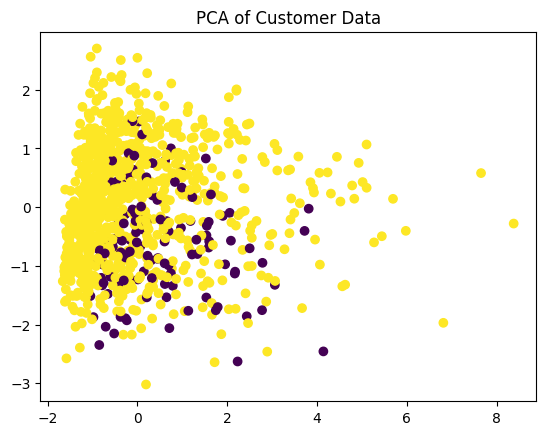

In [34]:
# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title('PCA of Customer Data')
plt.show()
